# Δραστηριότητα 1: Γραμμική προσαρμογή δεδομένων
------------------------

Με αυτή την ασκήση σκοπός μας είναι να χρησιμοποιήσουμε βασικές εντολές της Python. Παράλληλα θα δούμε πως να χρησιμοποιούμε κάποιες πολύ βασικές βιβλιοθήκες (numpy, scipy) για ολοκλήρωση και ελάχιστα τετράγωνα. Τέλος, θα δούμε πώς φορτώνουμε δεδομένα απο αρχείο και πώς κατασκευάζουμε γραφικές παραστάσεις.

Απο φυσικής πλευράς, η άσκηση αφορά την μελέτη της σχέσης που συνδέει την απόσταση φωτεινότητας ($D_{L}$) ενός αστροφυσικού αντικειμένου με την διαφορα φαινόμενο - απόλυτο μέγεθος $(m- M)$, $\mu$. Γνωρίζουμε ότι (αν $D_{L}$ σε Mpc):

$$\mu_{theor.} = 5 log_{10}\left(D_L\right) + 25$$

Θα χρησιμοποιήσουμε πραγματικές μετρήσεις απο υπερκαινοφανείς αστέρες τύπου Ιa, SN Ia, οι οποίες βρισκόνται στο αρχείο
SupernovaData.txt. Οι μετρήσεις αυτές προέρχονται απο τους <cite> Suzuki et al, 2012 </cite> και αποτελούν τη λεγόμενη *Union 2.1* συλλογή.

## Φορτωση Modules
H python περιλαμβάνει πολλές έτοιμες μεθόδους, κλάσεις και συναρτήσεις που μπορούμε να χρησιμοποιήσουμε, στη συνέχεια θα δειξουμε πως μπορούμε να τις "φορτώσουμε".

Οι μέθοδοι αυτοί βρίσκονται μέσα σε βιβλιοθήκες (modules). Συγκεκριμένα θα ασχοληθούμε με τις numpy, scipy, matplotlib.

Μπορούμε να φορτώσουμε την scipy (για παράδεγιμα) με τους εξής τρόπους:
```python 
import scipy
from scipy import special,optimize
import scipy.special as sp
from scipy import *
```

Έστω τώρα οτι χρειάζομαι ένα αντικείμενο που βρίσκεται εντός του ```special``` πχ την συνάρτηση σφάλματος,  ```erf(x)```. O τρόπος με τον καλείται αυτή ανάλογα με τα παραπάνω είναι:

```python 
scipy.special.erf()
special.erf()
sp.erf()
erf()
```

Ποιά τα πλεονεκτήματα και μειονεκτήματα του καθενός;
Ο πρωτός θα φορτώσει **όλες** τις κλάσεις που περιέχει η βιβλιοθήκη μου και για να καλέσω τη συνάρτηση που θέλω θα πρέπει αρχικά να "καλέσω" την κλάσση που περιέχει την συνάρτηση μου.

Ο δεύτερος τρόπος θα καλέσει **μόνο** το περιεχόμενο των κλάσεων ή/και συναρτήσεων που του λέω. 

Ο τρίτος θα καλέσει μόνο μιά κλάση, την οποιά θα "καλώ" με το "συνθηματικό" ```sp```. 
O τρίτος τρόπος θα φορτώσει **όλες** τις κλασεις της βιβλιοθήκες και όλες τις συναρτήσεις. Αν έχω φορτώσει δυο βιβλιοθήκες που έχουν και οι δυο συνάρτηση ονόματι ```erf(x)```, "κερδίζει" η βιβλιοθήκη που έχει κληθεί τελευταία. 

Γενικά, αν χρειάζομαι 2-3 αντικείμενα απο την κλάση ```clasi_1``` του module ```test_mod``` καλό είναι να χρησιμοποιώ το εξής:
```python
from test_mod.clasi_1 import antikeimeno1,antikeimeno2,antikeimeno3
```
Αν χρειάζομαι περισσότερα, καλύτερο είναι το 
```python 
import test_mod.clasi_1 as tmc
``` 
(ή όποιο άλλο συνθηματικό θέλω). 

Αποφεύγω το 
```python
from clasi_1 import * 
``` 
γιατι απο τη μια φορτώνει πολύ περισσοτερα αντικείμενα απο όσα χρειάζομαι και απο την άλλη δημιουργεί conflicts μεταξυ διαφόρων αντικειμένων με το ίδιο όνομα.

In [3]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
xx=np.linspace(0,2,num=100)
yy=np.exp(xx)

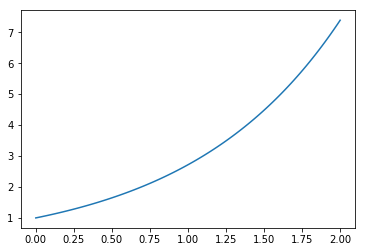

In [16]:
plt.plot(xx,yy)

Ορίζουμε την συνάρτηση της απόστασης φωτεινότητας.
$$
D_L(z)= (1+z) \frac{c}{H_0}\int _0 ^z \frac{1}{\sqrt{\Omega _m (1+z')^3 +1 -\Omega _m}} dz'
$$ 

In [29]:
def f(z,Om): return 1./np.sqrt(Om*(1.+z)**3+1.-Om)

In [39]:
def lum_dist(z,c=3e5,Om=0.3,Ho=70.0):
    '''
    luminocity distance (imposing flat LambdaCDM cosmology)
    Input: (float) redshift,c (in km/sec), Omega, H0 (in km/(s*pc))
    Output: (float) luminocity distance (units: Μpc)
    '''
    olokl = integrate.quad(f,0.,z,args=(Om))
    #integrate.quad(
    #    lambda za:1./(Om * (1.+za)**3.0 + 1. - Om)**0.5,0.0,z
    #)
    res = (1.0 + z)*(c/Ho) * olokl[0]
    return res

H επόμενη εντολή φορτώνει το αρχείο ```SupernovaDataPNaNs.txt``` με χρήση της συνάρτησης της ```numpy```, ```loadtxt```. Aπό αυτό χρησιμοποιεί τα δεδομένα της 2ης, 3ης, και 4ης στήλης τα οποία είναι $z$, $\mu_{obs}$, $\sigma_{\mu}$ αντίστοιχα.

In [43]:
dataSN = np.loadtxt('SupernovaData.txt', usecols=(1,2,3))

Ας δούμε κάποια στοχεία για την ποσότητα ```dataSN```:

In [3]:
type(dataSN),len(dataSN), dataSN.shape

(numpy.ndarray, 580, (580, 3))

Ακολούθως θα κατασκευάσουμε ένα πίνακα με τις τιμές της απόστασης φωτεινότητας για όλα τα $z$.

In [49]:
dls = [] #ορισμός μιας κενής λίστας
all_m_obs = [] 
all_errors = []
for i,element in enumerate(dataSN): #Η μετ. element παιρνει την τιμή κάθε στοιχείου του πιν. SN Ia.
    print(i,element,element.shape)
    z = element[0] # Η μετ. element είναι λίστα τριών στοιχείων, το z ειναι το πρώτο.
    mobs = element[1] #το m_obs είναι το δεύτερο
    mobs_err = element[2]
    all_errors.append(mobs_err)
    all_m_obs.append(mobs) # 'Κολλάω' στο dls το στοιχείο dl.
    dl = lum_dist(z) #υπολογιζω το dl για το συγκεκριμένο z
    dls.append(dl) # 'Κολλάω' στο dls το στοιχείο dl.
    if i>10: break

(0, array([  2.84880000e-02,   3.53465834e+01,   2.23905933e-01]), (3,))
(1, array([  0.050043  ,  36.68236792,   0.16682885]), (3,))
(2, array([  0.052926  ,  36.81769125,   0.15575591]), (3,))
(3, array([  0.070086  ,  37.44673654,   0.15846693]), (3,))
(4, array([  0.062668  ,  37.48340935,   0.15609943]), (3,))
(5, array([  0.087589  ,  38.22905705,   0.18774568]), (3,))
(6, array([  0.078577  ,  37.48816226,   0.15563566]), (3,))
(7, array([  1.72270000e-02,   3.46543700e+01,   1.99337180e-01]), (3,))
(8, array([  0.042233  ,  36.33645955,   0.16717404]), (3,))
(9, array([  0.045295  ,  36.64027218,   0.16498125]), (3,))
(10, array([  0.03648   ,  35.90532197,   0.17017495]), (3,))
(11, array([  1.95990000e-02,   3.45852174e+01,   1.84691220e-01]), (3,))


Ο παραπάνω τρόπος δεν είναι ο βέλτιστος. (Γιατί;;). 
Στην πραγματικότητα δεν ειναι καν καλός τρόπος.
Εν συνεχεία κατασκευάζουμε την γραφική παράσταση $\mu_{obs} = f(d_l)$

In [60]:
z=dataSN[:,0]
m_obs=dataSN[:,1]
m_error=dataSN[:,2]
dl=np.array([lum_dist(zi) for zi in z])

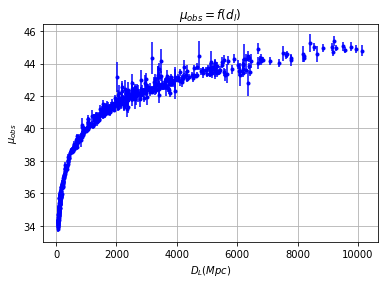

In [65]:
#plt.plot(dl,m_obs,'.',color = 'blue',)
plt.errorbar(dl,m_obs,yerr=m_error,fmt='.',color = 'blue')
plt.title('$\mu_{obs} = f(d_l)$')
plt.xlabel('$D_{L}(Mpc)$')
plt.ylabel('$\mu_{obs}$')
plt.grid(True)

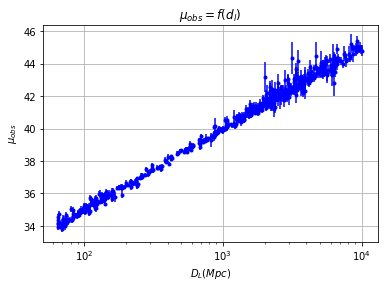

In [67]:
plt.errorbar(dl,m_obs,yerr=m_error,fmt='.',color = 'blue')
plt.title('$\mu_{obs} = f(d_l)$')
plt.xlabel('$D_{L}(Mpc)$')
plt.ylabel('$\mu_{obs}$')
plt.grid(True)
plt.xscale('log')

Ο λογάριθμός με βάση το 10 της απόστ. φωτεινότητας δίνεται ως:

In [68]:
log_dl= np.log10(dl)

Βλέπουμε οτι στις συναρτήσεις της numpy μπορούμε να δώσουμε ως όρισμα πίνακα και να έχουμε το αποτέλεσμα μιάς for
σε μια γραμμή. Προφανώς αλγοριθμικά είναι το ίδιο αλλα απο πλευράς ταχύτητας είναι πολύ καλύτερη η χρήση της numpy.

In [69]:
from scipy.optimize import curve_fit

In [81]:
def ff(x,a,b):
    return a*x+b
#plot res% = f(z) + fitting
res,cov= curve_fit(
    ff, xdata=log_dl,ydata=m_obs,p0=[5.0,20.],
    sigma=m_error, method='lm')
print(res,cov)
d=np.sqrt(np.diag(cov))

(array([  5.0121713 ,  24.97238855]), array([[ 0.0001572 , -0.00045078],
       [-0.00045078,  0.00134273]]))


Text(0,0.5,u'$\\mu_{obs}$')

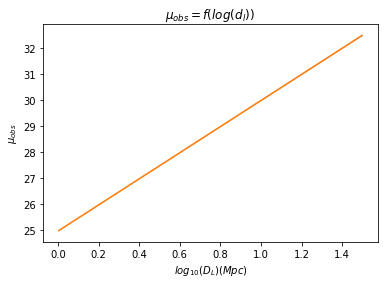

In [85]:
zz = np.linspace(0.001, 1.5, 200)
#plt.plot(zz, ff(zz, *res),color='black')
plt.fill_between(zz,ff(zz,res[0]-d[0],res[1]),ff(zz,res[0]+d[0],res[1]))
plt.fill_between(zz,ff(zz,res[0],res[1]-d[1]),ff(zz,res[0],res[1]+d[1]))
plt.title(r'$\mu_{obs} = f(log(d_l))$')
plt.xlabel('$log_{10}(D_{L})(Mpc)$')
plt.ylabel('$\mu_{obs}$')

Ας δούμε τα αποτελέσματα:

In [11]:
print('a = ',apotelesmata[0], ', b = ', apotelesmata[1])

('a = ', 5.0121712994687746, ', b = ', 24.972388552813193)


Διαμόρφωση εξόδου με 3 σημαντικά ψηφία:

In [88]:
print('a = {0:.3f}+-{1:.4f}, b = {2:.3f}+-{3:.4f}'.format(
    res[0],d[0],res[1],d[1]))

a = 5.012+-0.0125, b = 24.972+-0.0366


Τα σφάλματα είναι οι τετραγωνικές ρίζες των στοιχείων της διαγωνίου του πίνακα coavariances. Πως θα τα υπολογίσουμε;

In [13]:
#Α'τροπος
for i in range(0,len(covariances),1):
    for j in range(0,len(covariances),1):
        if i == j:
            print(covariances[i][j]**0.5)

0.0125380303196
0.0366432326869


Ποιο είναι το σφάλμα του α και ποιο το σφάλμα του β;

In [14]:
#Β'τροπος

In [15]:
print('sigma_a = {:.3f}, sigma_b = {:.3f}'.format(np.diag(covariances)[0]**0.5,np.diag(covariances)[1]**0.5))

sigma_a = 0.013, sigma_b = 0.037


Ποιος τρόπος είναι καλύτερος;

Πως μπορούμε να βελτιωσουμε τον παραπάνω κώδικα;

Μπορούμε να υπολογίσουμε την απόσταση κάθε σημείο απο την θεωρητική καμπύλη;